   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


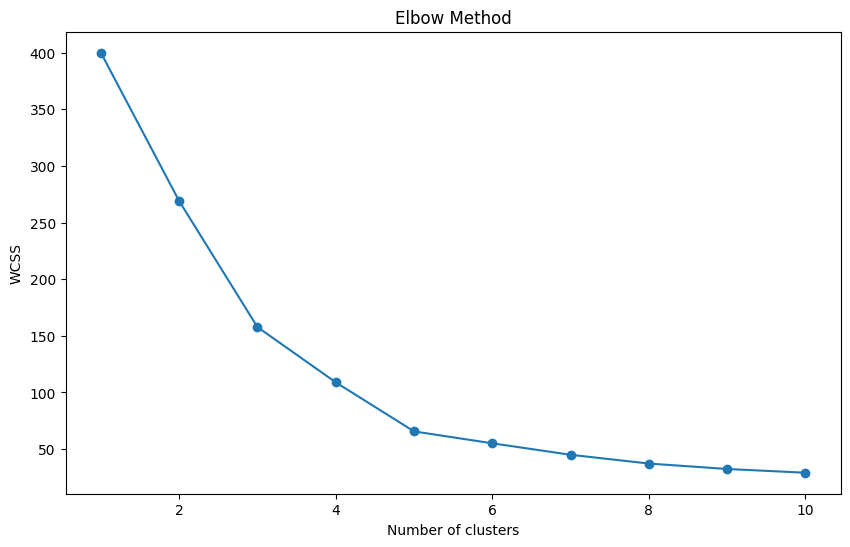

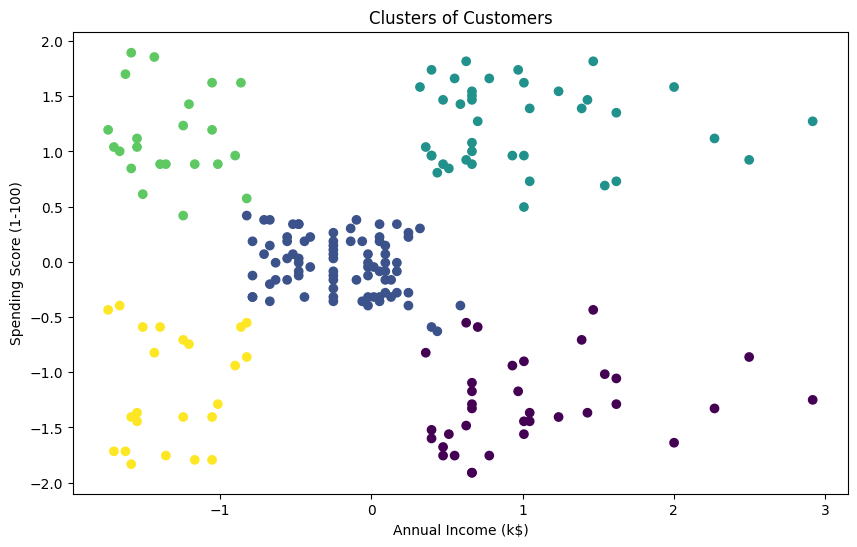

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv('/content/sample_data/Mall_Customers.csv')

# Display the first few rows of the dataframe
print(data.head())

# Select relevant features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
def elbow_method(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculate WCSS for different values of K
wcss = elbow_method(scaled_features)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the elbow plot, choose the optimal number of clusters (K)
optimal_k = 5  # Example value, choose based on the elbow plot

# Build and train the K-means model using TensorFlow
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Save the notebook
import nbformat as nbf

nb = nbf.v4.new_notebook()
text = """\
# K-means Clustering with TensorFlow

This notebook demonstrates how to perform K-means clustering using TensorFlow and determine the optimal number of clusters using the elbow method.
"""

code = """\
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataframe
print(data.head())

# Select relevant features for clustering
features = data[['Annual Income (k$$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
def elbow_method(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculate WCSS for different values of K
wcss = elbow_method(scaled_features)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the elbow plot, choose the optimal number of clusters (K)
optimal_k = 5  # Example value, choose based on the elbow plot

# Build and train the K-means model using TensorFlow
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_features)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
"""

nb['cells'] = [nbf.v4.new_markdown_cell(text), nbf.v4.new_code_cell(code)]

with open('KMeans_Clustering.ipynb', 'w') as f:
    nbf.write(nb, f)

###TensorFlow Approach

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


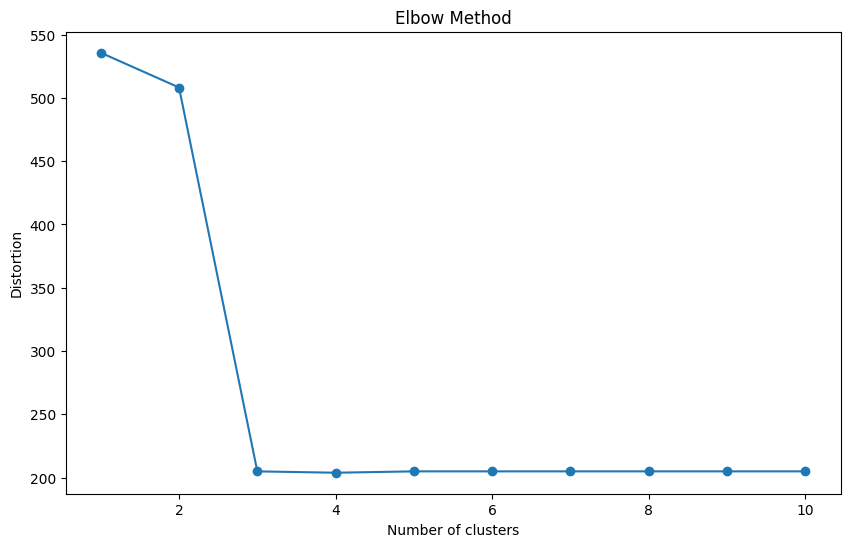

kiran 5


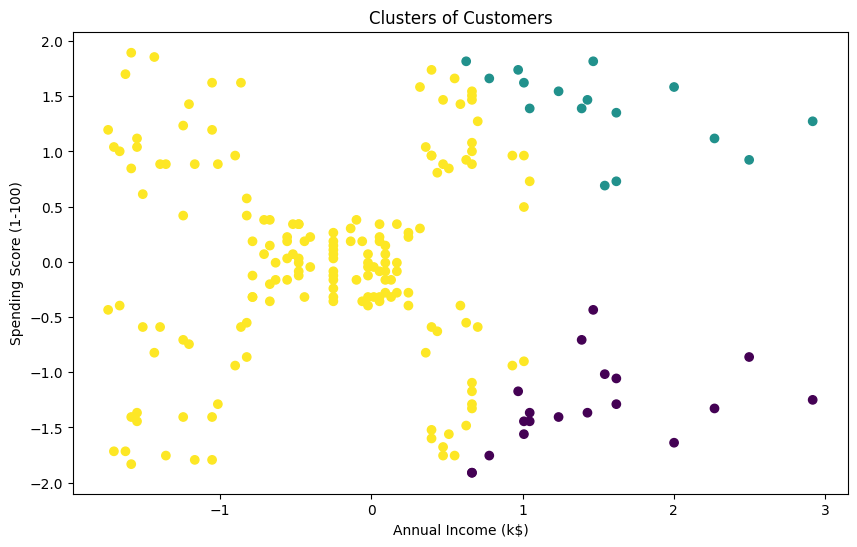

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('/content/sample_data/Mall_Customers.csv')

# Display the first few rows of the dataframe
print(data.head())

# Select relevant features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features).astype(np.float32)  # Ensure data is float32

# Determine the optimal number of clusters using the elbow method
def elbow_method(data):
    distortions = []
    for k in range(1, 11):
        kmeans = tf.compat.v1.estimator.experimental.KMeans(num_clusters=k, use_mini_batch=False)
        kmeans.train(input_fn=lambda: tf.data.Dataset.from_tensor_slices((data)).batch(32), steps=100)
        cluster_centers = kmeans.cluster_centers()
        pred = list(kmeans.predict_cluster_index(input_fn=lambda: tf.data.Dataset.from_tensor_slices((data)).batch(32)))
        # Calculate the distortion for each data point
        distortion = np.sum([np.linalg.norm(data[i] - cluster_centers[pred[i]]) for i in range(len(data))])
        distortions.append(distortion)
    return distortions

# Calculate distortions for different values of K
distortions = elbow_method(scaled_features)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# From the elbow plot, choose the optimal number of clusters (K)
optimal_k = 5  # Example value, choose based on the elbow plot
print ("kiran", optimal_k)
# Build and train the K-means model using TensorFlow
kmeans = tf.compat.v1.estimator.experimental.KMeans(num_clusters=optimal_k, use_mini_batch=False)
kmeans.train(input_fn=lambda: tf.data.Dataset.from_tensor_slices((scaled_features)).batch(32), steps=100)

# Predict the cluster for each data point
cluster_indices = list(kmeans.predict_cluster_index(input_fn=lambda: tf.data.Dataset.from_tensor_slices((scaled_features)).batch(32)))

# Add the cluster labels to the original data
data['Cluster'] = cluster_indices

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Let's break down the code step by step to understand what each part does.

### Import Necessary Libraries
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
```
- **pandas**: Used for data manipulation and analysis.
- **numpy**: Used for numerical operations.
- **matplotlib.pyplot**: Used for plotting graphs.
- **tensorflow**: Used for machine learning and deep learning tasks.
- **sklearn.preprocessing.StandardScaler**: Used for standardizing features by removing the mean and scaling to unit variance.

### Load the Data
```python
data = pd.read_csv('/content/sample_data/Mall_Customers.csv')
```
- **pd.read_csv**: Reads a CSV file into a DataFrame.
- **'/content/sample_data/Mall_Customers.csv'**: Path to the CSV file containing the data.

### Display the First Few Rows of the DataFrame
```python
print(data.head())
```
- **data.head()**: Displays the first five rows of the DataFrame to give a quick look at the data.

### Select Relevant Features for Clustering
```python
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
```
- **data[['Annual Income (k$)', 'Spending Score (1-100)']]**: Selects the 'Annual Income (k$)' and 'Spending Score (1-100)' columns from the DataFrame for clustering.

### Normalize the Data
```python
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features).astype(np.float32)
```
- **StandardScaler()**: Initializes the scaler.
- **scaler.fit_transform(features)**: Fits the scaler to the features and transforms them to have a mean of 0 and a standard deviation of 1.
- **astype(np.float32)**: Ensures the data is of type `float32` for compatibility with TensorFlow.

### Determine the Optimal Number of Clusters Using the Elbow Method
```python
def elbow_method(data):
    distortions = []
    for k in range(1, 11):
        kmeans = tf.compat.v1.estimator.experimental.KMeans(num_clusters=k, use_mini_batch=False)
        kmeans.train(input_fn=lambda: tf.data.Dataset.from_tensor_slices((data)).batch(32), steps=100)
        cluster_centers = kmeans.cluster_centers()
        pred = list(kmeans.predict_cluster_index(input_fn=lambda: tf.data.Dataset.from_tensor_slices((data)).batch(32)))
        distortion = np.sum([np.linalg.norm(data[i] - cluster_centers[pred[i]]) for i in range(len(data))])
        distortions.append(distortion)
    return distortions
```
- **elbow_method(data)**: Defines a function to calculate distortions for different values of K (number of clusters).
- **distortions = []**: Initializes an empty list to store distortion values.
- **for k in range(1, 11)**: Iterates over a range of cluster numbers from 1 to 10.
- **tf.compat.v1.estimator.experimental.KMeans**: Initializes the KMeans estimator with the specified number of clusters.
- **kmeans.train**: Trains the KMeans model.
- **kmeans.cluster_centers()**: Retrieves the cluster centers.
- **kmeans.predict_cluster_index**: Predicts the cluster index for each data point.
- **np.linalg.norm(data[i] - cluster_centers[pred[i]])**: Calculates the Euclidean distance between each data point and its assigned cluster center.
- **np.sum([...])**: Sums the distances to get the total distortion for the current number of clusters.
- **distortions.append(distortion)**: Appends the calculated distortion to the list.

### Calculate Distortions for Different Values of K
```python
distortions = elbow_method(scaled_features)
```
- **elbow_method(scaled_features)**: Calls the elbow method function with the scaled features to calculate distortions.

### Plot the Elbow Curve
```python
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
```
- **plt.figure(figsize=(10, 6))**: Creates a new figure with the specified size.
- **plt.plot(range(1, 11), distortions, marker='o')**: Plots the distortions against the number of clusters.
- **plt.title('Elbow Method')**: Sets the title of the plot.
- **plt.xlabel('Number of clusters')**: Sets the x-axis label.
- **plt.ylabel('Distortion')**: Sets the y-axis label.
- **plt.show()**: Displays the plot.

### Choose the Optimal Number of Clusters (K)
```python
optimal_k = 5  # Example value, choose based on the elbow plot
```
- **optimal_k = 5**: Sets the optimal number of clusters based on the elbow plot. This value should be chosen by visually inspecting the elbow plot.

### Build and Train the K-means Model Using TensorFlow
```python
kmeans = tf.compat.v1.estimator.experimental.KMeans(num_clusters=optimal_k, use_mini_batch=False)
kmeans.train(input_fn=lambda: tf.data.Dataset.from_tensor_slices((scaled_features)).batch(32), steps=100)
```
- **tf.compat.v1.estimator.experimental.KMeans**: Initializes the KMeans estimator with the optimal number of clusters.
- **kmeans.train**: Trains the KMeans model.

### Predict the Cluster for Each Data Point
```python
cluster_indices = list(kmeans.predict_cluster_index(input_fn=lambda: tf.data.Dataset.from_tensor_slices((scaled_features)).batch(32)))
```
- **kmeans.predict_cluster_index**: Predicts the cluster index for each data point.
- **list(...)**: Converts the predicted cluster indices to a list.

### Add the Cluster Labels to the Original Data
```python
data['Cluster'] = cluster_indices
```
- **data['Cluster'] = cluster_indices**: Adds a new column 'Cluster' to the DataFrame with the predicted cluster indices.

### Visualize the Clusters
```python
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
```
- **plt.figure(figsize=(10, 6))**: Creates a new figure with the specified size.
- **plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis')**: Creates a scatter plot of the data points, colored by their cluster labels.
- **plt.title('Clusters of Customers')**: Sets the title of the plot.
- **plt.xlabel('Annual Income (k$)')**: Sets the x-axis label.
- **plt.ylabel('Spending Score (1-100)')**: Sets the y-axis label.
- **plt.show()**: Displays the plot.

This code performs K-means clustering on the customer data, determines the optimal number of clusters using the elbow method, and visualizes the resulting clusters.